# Import libraries

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Load Data

In [28]:
# Load the Netflix dataset
data = pd.read_csv("/content/netflix_titles.csv")

In [29]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Preprocessing

In [30]:
# ========== Step 1: Data Preprocessing ==========
print("Initial dataset shape:", data.shape)

# Handle missing values
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data = data.dropna(subset=['title', 'listed_in'])

# Combine relevant columns into a single "content" column
data['content'] = (
    data['director'] + ' ' +
    data['cast'] + ' ' +
    data['listed_in'] + ' ' +
    data['description']
)

print("Dataset shape after preprocessing:", data.shape)
print("Sample content:", data['content'].iloc[0])

Initial dataset shape: (8807, 12)
Dataset shape after preprocessing: (8807, 13)
Sample content: Kirsten Johnson Unknown Documentaries As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [31]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,content
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson Unknown Documentaries As her f...
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Unknown Ama Qamata, Khosi Ngema, Gail Mabalane..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Julien Leclercq Sami Bouajila, Tracy Gotoas, S..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Unknown Unknown Docuseries, Reality TV Feuds, ..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"Unknown Mayur More, Jitendra Kumar, Ranjan Raj..."


# Visualizing

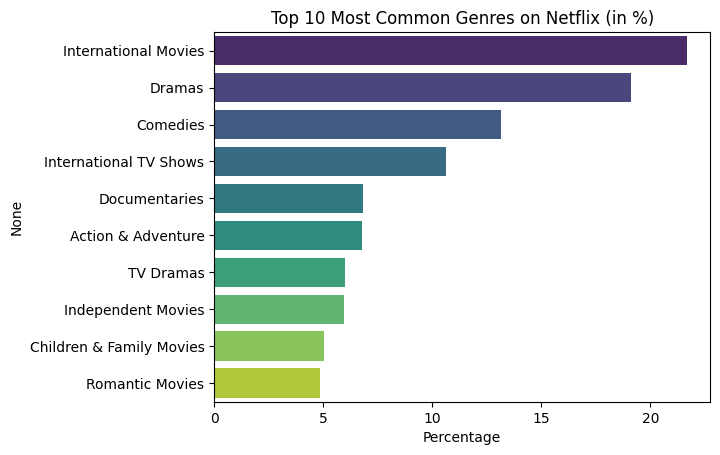

In [32]:
# ========== Visualization ==========
# Top genres visualization
top_genres = data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
genre_percentages = (top_genres / top_genres.sum()) * 100

sns.barplot(x=genre_percentages.values, y=genre_percentages.index, hue=genre_percentages.index, palette='viridis', legend=False)
plt.xlabel('Percentage')
plt.title('Top 10 Most Common Genres on Netflix (in %)')
plt.show()

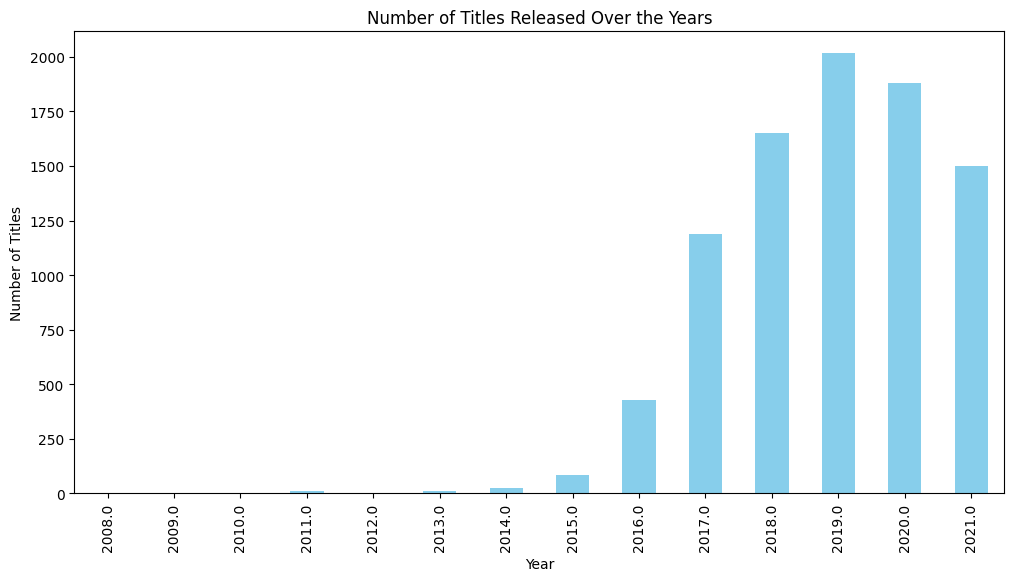

In [33]:
# Extract release year
data['release_year'] = data['date_added'].str.extract(r'(\d{4})')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Plot number of titles per year
titles_per_year = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
titles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Feature Engineering

In [34]:
# ========== Step 2: Feature Engineering ==========
# Convert "content" column into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', max_features=7000, ngram_range=(1, 2)
)  # Adjusted hyperparameters
tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (8807, 7000)


In [35]:
print(tfidf_matrix)

  (0, 3434)	0.5882937926827122
  (0, 3137)	0.42376838284735113
  (0, 6524)	0.08128612732366224
  (0, 1666)	0.13211531475926747
  (0, 2078)	0.17285100346469062
  (0, 1896)	0.2381989941151441
  (0, 3650)	0.13389231353887465
  (0, 2139)	0.24380573246378706
  (0, 5933)	0.2968984940865831
  (0, 1498)	0.1930971169928804
  (0, 6737)	0.2416098192413873
  (0, 2639)	0.17507088876721835
  (0, 2017)	0.2132595811164626
  (0, 6530)	0.16230921455692943
  (1, 6524)	0.06581373202817695
  (1, 1626)	0.22435497807597282
  (1, 4380)	0.19928012648411417
  (1, 1120)	0.21800301598324343
  (1, 3240)	0.24277841304198816
  (1, 5526)	0.24536306803877117
  (1, 6796)	0.16489960630331274
  (1, 4120)	0.17210512335374184
  (1, 4702)	0.15500339958414378
  (1, 2908)	0.05677102912121817
  (1, 6459)	0.21425590560308885
  :	:
  (8806, 4685)	0.15114383674538337
  (8806, 2909)	0.06752206363968219
  (8806, 6734)	0.1542681723769352
  (8806, 1736)	0.09292796482427357
  (8806, 5469)	0.1503287172564336
  (8806, 4320)	0.2488232182

# Build the KNN Model

In [36]:
# ========== Step 3: Build the KNN Model ==========
# Train KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
knn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [37]:
# Recommendation function
def get_recommendations(title, knn_model, data, tfidf_matrix, n_recommendations=5):
    """
    Recommend movies or shows based on the input title.
    """
    try:
        idx = data[data['title'].str.lower() == title.lower()].index[0]
    except IndexError:
        print(f"Title '{title}' not found in the dataset.")
        random_titles = data.sample(n=n_recommendations)['title'].values
        print("Here are some random recommendations for you:")
        for i, rec in enumerate(random_titles, start=1):
            print(f"{i}. {rec}")
        return random_titles


    distances, indices = knn_model.kneighbors(tfidf_matrix[idx], n_neighbors=n_recommendations + 1)
    recommended_titles = data.iloc[indices.flatten()[1:]]['title'].values

    # Friendly recommendation message
    print(f"\nIf you enjoyed '{title}', you might also like:")
    for i, rec in enumerate(recommended_titles, start=1):
        print(f"{i}. {rec}")

    return recommended_titles

# Test the recommendation system
sample_title = input("\nEnter the name of a movie or TV show: ")
recommendations = get_recommendations(sample_title, knn_model, data, tfidf_matrix)


Enter the name of a movie or TV show: Ganglands

If you enjoyed 'Ganglands', you might also like:
1. The Eagle of El-Se'eed
2. Lupin
3. Dealer
4. Fatal Destiny
5. Smoking


# Evaluation Metrics

In [38]:
# ========== Step 4: Evaluation Metrics ==========
# Precision at K (P@K)
def precision_at_k(recommended_titles_idx, actual_title, data, k=10):
    """
    Calculate Precision at K by checking if the recommended titles match the genre of the actual title.
    """
    # Handle the case where the actual title isn't found
    try:
        idx = data[data['title'].str.lower() == actual_title.lower()].index[0]
    except IndexError:
        print(f"Actual title '{actual_title}' not found during evaluation.")
        return 0  # or some other appropriate value

    actual_genre = data.iloc[idx]['listed_in']
    recommended_genres = data.iloc[recommended_titles_idx]['listed_in'].values

    relevant = [1 if actual_genre in genre else 0 for genre in recommended_genres]
    precision = sum(relevant) / k
    return precision

# Test P@K for recommendations
recommended_titles_idx = [data[data['title'] == title].index[0] for title in recommendations if title in data['title'].values] # Only calculate for recommendations in data

p_at_k = precision_at_k(recommended_titles_idx, sample_title, data, k=10)
print(f"Precision at K: {p_at_k}")

Precision at K: 0.5


In [39]:
def calculate_mse(recommended_titles_idx, actual_title, data, knn_model, tfidf_matrix):
    """
    Calculate the Mean Squared Error for the recommendation system.
    """
    # Handle missing title case
    try:
        actual_idx = data[data['title'].str.lower() == actual_title.lower()].index[0]
    except IndexError:
        return "Actual title not found in the dataset."

    actual_genre = data.iloc[actual_idx]['listed_in']

    # Get similarity scores for the recommended titles
    distances, indices = knn_model.kneighbors(tfidf_matrix[actual_idx], n_neighbors=len(recommended_titles_idx) + 1)
    predicted_scores = 1 - distances.flatten()[1:]  # Convert cosine distances to similarity scores

    # Generate ground truth (1 for relevant, 0 for not relevant)
    recommended_genres = data.iloc[recommended_titles_idx]['listed_in'].values
    ground_truth = [1 if actual_genre in genre.split(', ') else 0 for genre in recommended_genres]

    # Calculate MSE
    mse = mean_squared_error(ground_truth, predicted_scores)
    return mse


# Example usage
mse_value = calculate_mse(recommended_titles_idx, sample_title, data, knn_model, tfidf_matrix)
print(f"Mean Squared Error (MSE): {mse_value}")

Mean Squared Error (MSE): 0.09204595767495978


# Custom Evaluation for KNN

In [40]:
# ========== Step 5: Custom Evaluation for KNN ==========
# Custom evaluation for NearestNeighbors: Average Distance
def evaluate_knn(n_neighbors, tfidf_matrix):
    """
    Evaluate the KNN model for a given number of neighbors by calculating
    the average similarity distance for a subset of the data.
    """
    knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=n_neighbors)
    knn.fit(tfidf_matrix)

    # Calculate pairwise distances for a subset of data
    distances, _ = knn.kneighbors(tfidf_matrix[:100])  # Evaluate for a subset
    avg_distance = np.mean(distances)
    return avg_distance

# Evaluate KNN for different neighbor values
neighbor_options = [5, 10, 15, 20]
performance = {n: evaluate_knn(n, tfidf_matrix) for n in neighbor_options}
print("\nAverage distances for each neighbor option:", performance)


Average distances for each neighbor option: {5: 0.5308520289267432, 10: 0.6373024091345204, 15: 0.6880967189933939, 20: 0.7176342471265277}


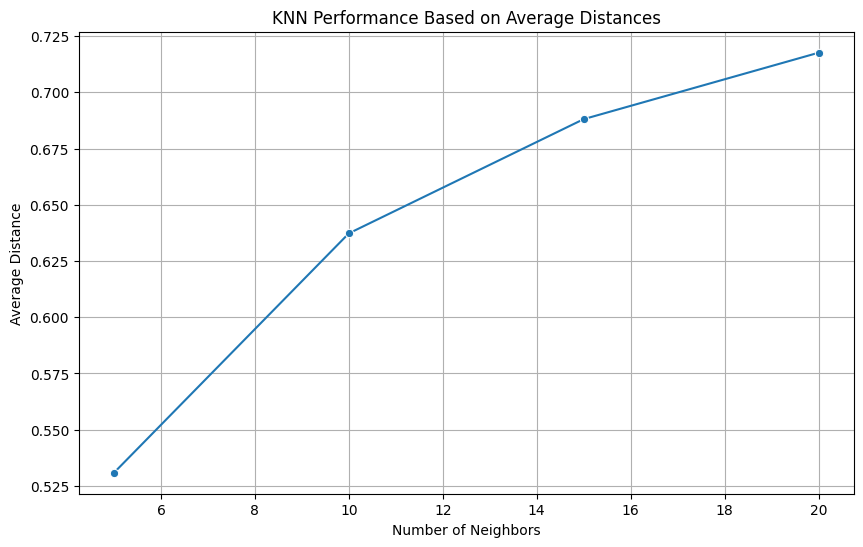

In [41]:
# Visualize performance
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(performance.keys()), y=list(performance.values()), marker='o')
plt.title("KNN Performance Based on Average Distances")
plt.xlabel("Number of Neighbors")
plt.ylabel("Average Distance")
plt.grid()
plt.show()

# Hyperparameter Tuning

In [42]:
# ========== Step 6: Hyperparameter Tuning ==========
# Tune both max_features and n_neighbors
feature_options = [5000, 7000, 10000]
performance = {}

for features in feature_options:
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=features, ngram_range=(1, 2))
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])

    for neighbors in neighbor_options:
        avg_distance = evaluate_knn(neighbors, tfidf_matrix)
        performance[(features, neighbors)] = avg_distance

# Optimal hyperparameters
optimal_params = min(performance, key=performance.get)
print(f"\nOptimal Parameters: Max Features = {optimal_params[0]}, Neighbors = {optimal_params[1]}")

# Final Recommendations with Tuned Parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=optimal_params[0], ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=optimal_params[1])
knn_model.fit(tfidf_matrix)
recommendations_tuned = get_recommendations(sample_title, knn_model, data, tfidf_matrix)


Optimal Parameters: Max Features = 5000, Neighbors = 5

If you enjoyed 'Ganglands', you might also like:
1. The Eagle of El-Se'eed
2. Lupin
3. Fatal Destiny
4. Smoking
5. Dealer


# Evaluation Metrics

In [43]:
# ========== Step 4: Evaluation Metrics ==========
# Precision at K (P@K)
def precision_at_k(recommended_titles_idx, actual_title, data, k=5):
    """
    Calculate Precision at K by checking if the recommended titles match the genre of the actual title.
    """
    # Handle the case where the actual title isn't found
    try:
        idx = data[data['title'].str.lower() == actual_title.lower()].index[0]
    except IndexError:
        print(f"Actual title '{actual_title}' not found during evaluation.")
        return 0  # or some other appropriate value

    actual_genre = data.iloc[idx]['listed_in']
    recommended_genres = data.iloc[recommended_titles_idx]['listed_in'].values

    relevant = [1 if actual_genre in genre else 0 for genre in recommended_genres]
    precision = sum(relevant) / k
    return precision

# Test P@K for recommendations
# Only calculate for recommendations in data
recommended_titles_idx = [data[data['title'] == title].index[0] for title in recommendations if title in data['title'].values]

p_at_k = precision_at_k(recommended_titles_idx, sample_title, data, k=5)
print(f"Precision at K: {p_at_k}")

Precision at K: 1.0


In [44]:
def calculate_mse(recommended_titles_idx, actual_title, data, knn_model, tfidf_matrix):
    """
    Calculate the Mean Squared Error for the recommendation system.
    """
    # Handle missing title case
    try:
        actual_idx = data[data['title'].str.lower() == actual_title.lower()].index[0]
    except IndexError:
        return "Actual title not found in the dataset."

    actual_genre = data.iloc[actual_idx]['listed_in']

    # Get similarity scores for the recommended titles
    distances, indices = knn_model.kneighbors(tfidf_matrix[actual_idx], n_neighbors=len(recommended_titles_idx) + 1)
    predicted_scores = 1 - distances.flatten()[1:]  # Convert cosine distances to similarity scores

    # Generate ground truth (1 for relevant, 0 for not relevant)
    recommended_genres = data.iloc[recommended_titles_idx]['listed_in'].values
    ground_truth = [1 if actual_genre in genre.split(', ') else 0 for genre in recommended_genres]

    # Calculate MSE
    mse = mean_squared_error(ground_truth, predicted_scores)
    return mse

mse_value = calculate_mse(recommended_titles_idx, sample_title, data, knn_model, tfidf_matrix)
print(f"Mean Squared Error (MSE): {mse_value}")

Mean Squared Error (MSE): 0.106524664272893


# Final Output

In [45]:
# ========== Final Output ==========
print("\nFinal Recommendations:")
for i, rec in enumerate(recommendations_tuned, start=1):
    print(f"{i}. {rec}")


Final Recommendations:
1. The Eagle of El-Se'eed
2. Lupin
3. Fatal Destiny
4. Smoking
5. Dealer
